## Leak Test 
### classement académique public : 6/26 , classement académique privé : 6/26 

In [1]:
import csv 
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
x_train = pd.read_csv(r'C:\Users\Utilisateur\Desktop\data challenge\Xtrain_hgcGIrA.csv')
y_train = pd.read_csv(r'C:\Users\Utilisateur\Desktop\data challenge\Ytrain_yL5OjS4.csv')
x_test = pd.read_csv(r'C:\Users\Utilisateur\Desktop\data challenge\Xtest.csv')

x_train['p0q0'] = y_train['p0q0']

#j'enleve tous les jours avec 'composition' = 1 pour pas interferer avec le leak
x_train.drop(x_train[x_train["date"] == '2019-01-30'].index, inplace=True)

columns_to_drop = ['hour', 'way', 'composition']
x_train.drop(columns=columns_to_drop, inplace=True)
x_test.drop(columns=columns_to_drop, inplace=True)

x_train["date"] = pd.to_datetime(x_train["date"])
x_test["date"] = pd.to_datetime(x_test["date"])

print(x_train.shape)
display(x_train.head())

(30980, 10)


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1,AD,NaN,NaN,NaN,0.201,0.138,0.091,0.216
1,2019-01-08,1,AD,NaN,NaN,NaN,0.204,0.152,0.106,0.216
2,2019-01-10,1,AD,NaN,NaN,NaN,0.213,0.153,0.111,0.227
3,2019-01-11,1,AD,NaN,NaN,NaN,0.213,0.152,0.108,0.229
4,2019-01-14,1,AD,NaN,NaN,NaN,0.210,0.147,0.096,0.225


## Identification du pattern 

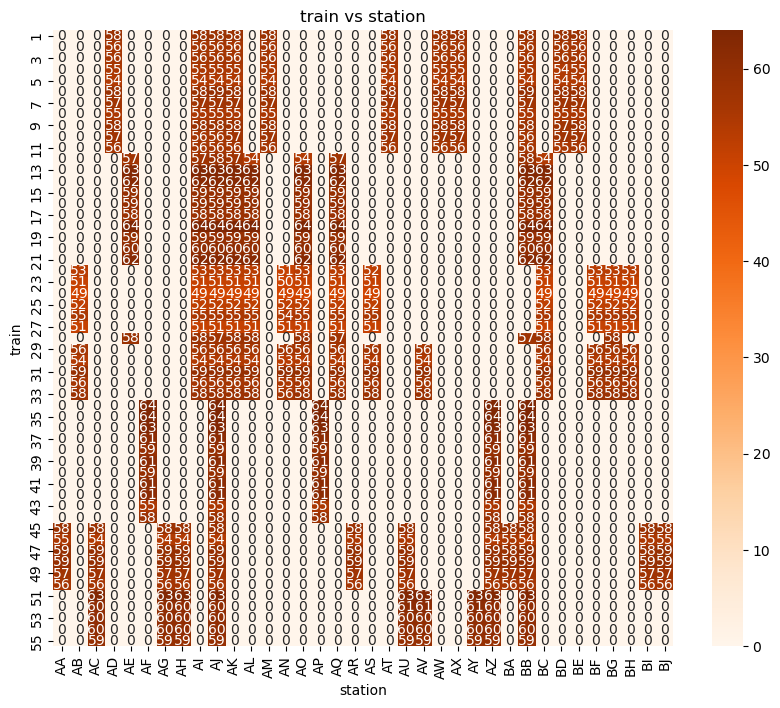

In [3]:
x = 'train'
y = 'station'
plt.figure(figsize=(10, 8))
cross_tab = pd.crosstab(x_train['train'], x_train['station'])
sns.heatmap(cross_tab, annot=True, cmap='Oranges')
plt.title(f'{x} vs {y}')
plt.show()

In [4]:
def four_digits(df, col):
    assert col in ['p0q1', 'p0q2', 'p0q3', 'p1q0', 'p2q0', 'p3q0', 'p0q0']

    def is_four_digits(row):
        if len(str(row[col])) > 5:
            return True
        return False

    mask = df.apply(is_four_digits, axis=1)
    
    # Rajout d'une nouvelle colonne pour les fausses données 
    df[f"{col}_fake"] = mask


dfs = {"x_train": x_train, "x_test": x_test}
cols = ['p0q1', 'p0q2', 'p0q3', 'p1q0', 'p2q0', 'p3q0', 'p0q0']

for df_name, df in dfs.items():
    for col in cols:
        if (df_name == "x_test") & (col == "p0q0"):
            continue
        four_digits(df, col)

# Display les fausses données 
for df_name, df in dfs.items():
    for col in cols:
        if (df_name == "x_test") & (col == "p0q0"):
            continue
        filtered_df = df[df[f"{col}_fake"] == True]
        print(f"Filtered {df_name} by {col}_fake rows:", filtered_df.shape[0])
        display(filtered_df.head())

Filtered x_train by p0q1_fake rows: 5


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,p0q0_fake
2005,2019-01-28,12,AJ,0.187,NaN,NaN,0.08280,0.11560,0.1264,0.132,True,True,True,False,False,False,False
2071,2019-02-13,12,AK,0.126,NaN,NaN,0.03492,0.02776,0.0168,0.047,True,True,True,False,False,False,False
2074,2019-02-19,12,AK,0.170,NaN,NaN,0.04080,0.03540,0.0200,0.030,True,True,False,False,False,False,False
2075,2019-02-21,12,AK,0.160,NaN,NaN,0.04080,0.03540,0.0200,0.039,True,True,False,False,False,False,False
28760,2019-04-09,6,AJ,0.463,0.539,0.403,0.41540,0.51900,0.4370,0.613,True,False,False,False,False,False,False


Filtered x_train by p0q2_fake rows: 12


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,p0q0_fake
1827,2019-01-16,11,BE,0.190,0.131,0.111,0.07700,0.11280,NaN,0.103,False,True,False,False,False,False,False
1899,2019-02-13,12,AE,NaN,NaN,NaN,0.04700,0.03820,0.03204,0.069,False,True,True,False,False,False,False
2005,2019-01-28,12,AJ,0.187,NaN,NaN,0.08280,0.11560,0.12640,0.132,True,True,True,False,False,False,False
2071,2019-02-13,12,AK,0.126,NaN,NaN,0.03492,0.02776,0.01680,0.047,True,True,True,False,False,False,False
2074,2019-02-19,12,AK,0.170,NaN,NaN,0.04080,0.03540,0.02000,0.030,True,True,False,False,False,False,False


Filtered x_train by p0q3_fake rows: 38


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,p0q0_fake
1604,2019-01-16,11,AW,0.235,0.149,0.13,0.077,0.1030,0.12920,0.119,False,False,True,False,False,False,False
1899,2019-02-13,12,AE,NaN,NaN,NaN,0.047,0.0382,0.03204,0.069,False,True,True,False,False,False,False
1902,2019-02-19,12,AE,NaN,NaN,NaN,0.030,0.0380,0.03220,0.060,False,False,True,False,False,False,False
1903,2019-02-21,12,AE,NaN,NaN,NaN,0.039,0.0380,0.03220,0.059,False,False,True,False,False,False,False
1956,2019-02-13,12,AI,0.145,NaN,NaN,0.069,0.0470,0.04344,0.094,False,False,True,False,False,False,False


Filtered x_train by p1q0_fake rows: 3682


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,p0q0_fake
66,2019-01-21,1,AI,0.111120,0.146,NaN,0.258,0.257,0.234,0.297,False,False,False,True,False,False,False
71,2019-01-29,1,AI,0.116824,0.178,NaN,0.221,0.220,0.204,0.229,False,False,False,True,False,False,False
75,2019-02-05,1,AI,0.116824,0.162,NaN,0.216,0.227,0.199,0.260,False,False,False,True,False,False,False
81,2019-02-14,1,AI,0.109320,0.136,NaN,0.232,0.253,0.216,0.280,False,False,False,True,False,False,False
86,2019-03-11,1,AI,0.109320,0.152,NaN,0.229,0.239,0.222,0.304,False,False,False,True,False,False,False


Filtered x_train by p2q0_fake rows: 3577


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,p0q0_fake
61,2019-01-11,1,AI,0.073,0.160248,NaN,0.229,0.253,0.213,0.281,False,False,False,False,True,False,False
62,2019-01-14,1,AI,0.116,0.158128,NaN,0.225,0.258,0.210,0.302,False,False,False,False,True,False,False
64,2019-01-17,1,AI,0.103,0.160248,NaN,0.228,0.239,0.209,0.260,False,False,False,False,True,False,False
70,2019-01-28,1,AI,0.146,0.168938,NaN,0.221,0.246,0.207,0.271,False,False,False,False,True,False,False
72,2019-01-31,1,AI,0.104,0.148200,NaN,0.213,0.241,0.196,0.268,False,False,False,False,True,False,False


Filtered x_train by p3q0_fake rows: 5343


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,p0q0_fake
119,2019-01-11,1,AJ,0.092,0.131,0.171667,0.229,0.281,0.253,0.285,False,False,False,False,False,True,False
120,2019-01-14,1,AJ,0.161,0.134,0.182667,0.225,0.302,0.258,0.315,False,False,False,False,False,True,False
132,2019-02-04,1,AJ,0.157,0.161,0.190667,0.217,0.302,0.245,0.315,False,False,False,False,False,True,False
137,2019-02-12,1,AJ,0.157,0.202,0.168467,0.207,0.247,0.228,0.273,False,False,False,False,False,True,False
143,2019-02-21,1,AJ,0.116,0.244,0.171333,0.204,0.240,0.222,0.262,False,False,False,False,False,True,False


Filtered x_train by p0q0_fake rows: 0


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,p0q0_fake


Filtered x_test by p0q1_fake rows: 7


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake
932,2019-06-14,12,AK,0.14300,NaN,NaN,0.027500,0.022250,0.012500,True,True,True,False,False,False
938,2019-06-25,12,AK,0.15275,NaN,NaN,0.028200,0.022400,0.015200,True,True,True,True,False,False
940,2019-06-27,12,AK,0.18000,NaN,NaN,0.029125,0.023813,0.015625,True,True,True,False,False,False
941,2019-06-28,12,AK,0.13600,NaN,NaN,0.029625,0.024362,0.015058,True,True,True,False,False,False
943,2019-07-02,12,AK,0.14600,NaN,NaN,0.027825,0.022562,0.013125,True,True,True,False,False,False


Filtered x_test by p0q2_fake rows: 11


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake
857,2019-06-14,12,AE,NaN,NaN,NaN,0.047,0.032500,0.02600,False,True,False,False,False,False
863,2019-06-25,12,AE,NaN,NaN,NaN,0.039,0.031200,0.02560,False,True,True,False,False,False
865,2019-06-27,12,AE,NaN,NaN,NaN,0.053,0.030333,0.02575,False,True,True,False,False,False
868,2019-07-02,12,AE,NaN,NaN,NaN,0.003,0.030400,0.02420,False,True,True,False,False,False
869,2019-07-05,12,AE,NaN,NaN,NaN,0.028,0.030080,0.02424,False,True,True,False,False,False


Filtered x_test by p0q3_fake rows: 25


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake
863,2019-06-25,12,AE,NaN,NaN,NaN,0.039,0.031200,0.02560,False,True,True,False,False,False
864,2019-06-26,12,AE,NaN,NaN,NaN,0.030,0.030000,0.02425,False,False,True,False,False,False
865,2019-06-27,12,AE,NaN,NaN,NaN,0.053,0.030333,0.02575,False,True,True,False,False,False
866,2019-06-28,12,AE,NaN,NaN,NaN,0.035,0.030000,0.02425,False,False,True,False,False,False
868,2019-07-02,12,AE,NaN,NaN,NaN,0.003,0.030400,0.02420,False,True,True,False,False,False


Filtered x_test by p1q0_fake rows: 1210


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake
45,2019-07-03,1,AI,0.13475,0.188,NaN,0.216,0.246,0.199,False,False,False,True,False,False
46,2019-07-04,1,AI,0.10960,0.176,NaN,0.246,0.265,0.227,False,False,False,True,False,False
69,2019-07-03,1,AJ,0.15420,0.237,0.165,0.216,0.302,0.246,False,False,False,True,False,False
70,2019-07-04,1,AJ,0.16240,0.202,0.164,0.246,0.294,0.265,False,False,False,True,False,False
93,2019-07-03,1,AK,0.04850,0.149,NaN,0.216,0.199,0.138,False,False,False,True,False,False


Filtered x_test by p2q0_fake rows: 1223


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake
28,2019-06-03,1,AI,0.089,0.171333,NaN,0.234,0.248,0.221,False,False,False,False,True,False
29,2019-06-04,1,AI,0.172,0.163583,NaN,0.196,0.206,0.180,False,False,False,False,True,False
30,2019-06-06,1,AI,0.164,0.174333,NaN,0.214,0.225,0.200,False,False,False,False,True,False
33,2019-06-12,1,AI,0.103,0.175479,NaN,0.214,0.223,0.196,False,False,False,False,True,False
37,2019-06-18,1,AI,0.189,0.179444,NaN,0.236,0.248,0.221,False,False,False,False,True,False


Filtered x_test by p3q0_fake rows: 2131


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake
49,2019-05-22,1,AJ,0.144,0.194500,0.165500,0.234,0.261,0.238,False,False,False,False,True,True
51,2019-05-29,1,AJ,0.156,0.207000,0.174333,0.212,0.253,0.223,False,False,False,False,False,True
53,2019-06-04,1,AJ,0.204,0.158000,0.178800,0.196,0.227,0.206,False,False,False,False,False,True
54,2019-06-06,1,AJ,0.196,0.191833,0.163600,0.214,0.256,0.225,False,False,False,False,True,True
61,2019-06-18,1,AJ,0.213,0.176000,0.167400,0.236,0.280,0.248,False,False,False,False,False,True


In [5]:
# Je drop la colonne 'p0q0_fake' car elle est toujours False 
x_train.drop(columns=["p0q0_fake"], inplace=True)

display(x_train.head())

,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake
0,2019-01-07,1,AD,NaN,NaN,NaN,0.201,0.138,0.091,0.216,False,False,False,False,False,False
1,2019-01-08,1,AD,NaN,NaN,NaN,0.204,0.152,0.106,0.216,False,False,False,False,False,False
2,2019-01-10,1,AD,NaN,NaN,NaN,0.213,0.153,0.111,0.227,False,False,False,False,False,False
3,2019-01-11,1,AD,NaN,NaN,NaN,0.213,0.152,0.108,0.229,False,False,False,False,False,False
4,2019-01-14,1,AD,NaN,NaN,NaN,0.210,0.147,0.096,0.225,False,False,False,False,False,False


In [6]:
def filter_date_train(date, train, df):
    filtered_df = df[(df['date'] == date) &
                     (df['train'] == train)].copy()
    return filtered_df

def filter_date_station(date, station, df):
    filtered_df = df[(df['date'] == date) &
                     (df['station'] == station)].copy()
    return filtered_df

def filter_date(date, df):
    filtered_df = df[(df['date'] == date)].copy()
    return filtered_df


In [7]:
def find_path_number(train_number):
    if 1 <= train_number <= 11:
        return 0
    elif 12 <= train_number <= 21:
        return 1
    elif 22 <= train_number <= 27:
        return 2
    elif train_number == 28:
        return 3
    elif 29 <= train_number <= 33:
        return 4
    elif 34 <= train_number <= 44:
        return 5
    elif 45 <= train_number <= 50:
        return 6
    elif 51 <= train_number <= 55:
        return 7
    else:
        print(f'train number {train_number} not found')
        return 'NaN'


def apply_path_number(df):
    df['path_number'] = df['train'].apply(find_path_number)


In [8]:
apply_path_number(x_train)
apply_path_number(x_test)

first_train_in_path = [1, 12, 22, 28, 29, 34, 45, 51]

for i in range(8):
    df = filter_date_train('2019-01-07', first_train_in_path[i], x_train)[['train', 'station', 'p0q1', 'p0q2', 'p0q3', 'p0q0', 'path_number']]
    display(df)

,train,station,p0q1,p0q2,p0q3,p0q0,path_number
0,1,AD,0.201,0.138,0.091,0.216,0
58,1,AI,0.216,0.230,0.201,0.275,0
116,1,AJ,0.216,0.275,0.230,0.282,0
174,1,AK,0.216,0.201,0.138,0.230,0
232,1,AM,0.138,0.091,0.084,0.201,0
290,1,AT,0.091,0.068,0.084,0.138,0
348,1,AW,0.045,0.068,0.084,0.091,0
406,1,AX,NaN,NaN,NaN,0.045,0
464,1,BB,0.275,0.282,0.230,0.282,0
522,1,BD,0.045,NaN,NaN,0.068,0


,train,station,p0q1,p0q2,p0q3,p0q0,path_number
1877,12,AE,0.044,0.028,0.023,0.065,1
1934,12,AI,0.065,0.044,0.028,0.097,1
1991,12,AJ,0.065,0.097,0.111,0.149,1
2049,12,AK,0.028,0.023,0.014,0.044,1
2106,12,AL,0.023,0.014,NaN,0.028,1
2160,12,AO,0.014,NaN,NaN,0.023,1
2214,12,AQ,0.065,0.097,0.044,0.111,1
2271,12,BB,0.097,0.149,0.111,0.162,1
2329,12,BC,NaN,NaN,NaN,0.014,1


,train,station,p0q1,p0q2,p0q3,p0q0,path_number
7949,22,AB,0.044,0.036,0.015,0.052,2
8002,22,AI,0.148,0.150,0.133,0.166,2
8055,22,AJ,0.166,0.148,0.180,0.183,2
8108,22,AK,0.150,0.133,0.102,0.148,2
8161,22,AL,0.133,0.102,0.084,0.150,2
8214,22,AN,0.036,0.015,NaN,0.044,2
8265,22,AO,0.102,0.077,0.084,0.133,2
8318,22,AQ,0.166,0.148,0.150,0.180,2
8371,22,AS,0.015,NaN,NaN,0.036,2
8423,22,BC,0.052,0.077,0.084,0.102,2


,train,station,p0q1,p0q2,p0q3,p0q0,path_number
11987,28,AE,0.082,0.074,0.058,0.123,3
12045,28,AI,0.123,0.082,0.074,0.165,3
12103,28,AJ,0.123,0.165,0.189,0.226,3
12160,28,AK,0.074,0.058,0.041,0.082,3
12218,28,AL,0.058,0.041,0.018,0.074,3
12276,28,AO,0.041,0.018,NaN,0.058,3
12334,28,AQ,0.123,0.165,0.082,0.189,3
12391,28,BB,0.165,0.226,0.189,0.270,3
12448,28,BC,0.018,NaN,NaN,0.041,3
12506,28,BG,NaN,NaN,NaN,0.018,3


,train,station,p0q1,p0q2,p0q3,p0q0,path_number
12564,29,AB,0.099,0.094,0.068,0.110,4
12620,29,AI,0.156,0.197,0.025,0.170,4
12676,29,AJ,0.170,0.156,0.194,0.213,4
12732,29,AK,0.197,0.191,0.025,0.156,4
12788,29,AL,0.191,0.175,0.149,0.197,4
12844,29,AN,0.094,0.068,NaN,0.099,4
12900,29,AO,0.175,0.138,0.149,0.191,4
12956,29,AQ,0.170,0.156,0.025,0.194,4
13012,29,AS,0.068,NaN,NaN,0.094,4
13068,29,AV,0.197,0.191,0.175,0.025,4


,train,station,p0q1,p0q2,p0q3,p0q0,path_number
17145,34,AF,0.080,0.048,NaN,0.139,5
17210,34,AJ,0.139,0.080,0.048,0.168,5
17275,34,AP,0.048,NaN,NaN,0.080,5
17340,34,AZ,NaN,NaN,NaN,0.048,5
17405,34,BB,0.139,0.168,0.080,0.185,5


,train,station,p0q1,p0q2,p0q3,p0q0,path_number
21119,45,AA,0.021,0.022,0.038,0.044,6
21178,45,AC,0.044,0.060,0.046,0.075,6
21237,45,AG,0.075,0.060,0.046,0.131,6
21296,45,AH,0.075,0.131,0.060,0.186,6
21355,45,AJ,0.131,0.186,0.225,0.238,6
21414,45,AR,NaN,NaN,NaN,0.021,6
21473,45,AU,0.044,0.038,0.046,0.060,6
21532,45,AZ,0.075,0.131,0.186,0.225,6
21591,45,BA,0.021,NaN,NaN,0.022,6
21650,45,BB,0.186,0.238,0.225,0.232,6


,train,station,p0q1,p0q2,p0q3,p0q0,path_number
25869,51,AC,0.193,0.106,0.171,0.214,7
25932,51,AG,0.214,0.193,0.171,0.290,7
25995,51,AH,0.214,0.290,0.193,0.354,7
26058,51,AJ,0.290,0.354,0.416,0.444,7
26121,51,AU,0.106,0.171,NaN,0.193,7
26184,51,AV,NaN,NaN,NaN,0.106,7
26247,51,AY,0.106,NaN,NaN,0.171,7
26310,51,AZ,0.214,0.290,0.354,0.416,7
26373,51,BB,0.354,0.444,0.416,0.467,7


In [9]:
path_list = []
# Path 0
path_list.append(['AX', 'BD', 'BE', 'AW', 'AT', 'AM', 'AD', 'AK', 'AI', 'AJ', 'BB'])
# Path 1
path_list.append(['BC', 'AO', 'AL', 'AK', 'AE', 'AI', 'AQ', 'AJ', 'BB'])
# Path 2
path_list.append(['BG', 'AS', 'AN', 'AB',
                  'BF', 'BH', 'BC', 'AO', 'AL', 'AK', 'AI', 'AQ', 'AJ'])
# Path 3
path_list.append(['BG', 'BC', 'AO', 'AL', 'AK',  'AE', 'AI', 'AQ', 'AJ', 'BB'])
# Path 4
path_list.append(['BG', 'AS', 'AN', 'AB',
                  'BF', 'BH', 'BC', 'AO', 'AL', 'AV', 'AK', 'AI', 'AQ', 'AJ'])
# Path 5
path_list.append(['AZ', 'AP', 'AF', 'AJ', 'BB'])
# Path 6
path_list.append(['AR', 'BA', 'BI', 'AA', 'BJ', 'AU', 'AC', 'AG', 'AH',
                  'AZ', 'AJ', 'BB'])
# Path 7
path_list.append(['AV', 'AY', 'AU', 'AC', 'AG', 'AH', 'AZ', 'AJ', 'BB'])


def find_stop_number(station, train_number):
    path_number = find_path_number(train_number)
    path = path_list[path_number]

    try:
        return path.index(station)
    except ValueError:
        print(f"Station {station} not found in path: {path} for train number: {train_number}")
        return 'NaN'


def add_stop(df):
    df['stop'] = df.apply(lambda x: find_stop_number(x['station'], x['train']), axis=1)
    df['Terminus'] = df.apply(lambda x: x['stop'] == len(path_list[find_path_number(x['train'])]) - 1, axis=1)


def display_path_with_stop(i, df):
    filtered_df = filter_date_train('2019-01-07', first_train_in_path[i], df)[
        ['train', 'station', 'p0q1', 'p0q2', 'p0q3', 'p0q0', 'path_number', 'stop']]
    filtered_df.sort_values(by=['stop'], inplace=True)
    display(filtered_df)

In [10]:
add_stop(x_train)
add_stop(x_test)

display(x_train.head())

,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,path_number,stop,Terminus
0,2019-01-07,1,AD,NaN,NaN,NaN,0.201,0.138,0.091,0.216,False,False,False,False,False,False,0,6,False
1,2019-01-08,1,AD,NaN,NaN,NaN,0.204,0.152,0.106,0.216,False,False,False,False,False,False,0,6,False
2,2019-01-10,1,AD,NaN,NaN,NaN,0.213,0.153,0.111,0.227,False,False,False,False,False,False,0,6,False
3,2019-01-11,1,AD,NaN,NaN,NaN,0.213,0.152,0.108,0.229,False,False,False,False,False,False,0,6,False
4,2019-01-14,1,AD,NaN,NaN,NaN,0.210,0.147,0.096,0.225,False,False,False,False,False,False,0,6,False


In [11]:
for i in range(8):
    display_path_with_stop(i, x_train)


,train,station,p0q1,p0q2,p0q3,p0q0,path_number,stop
406,1,AX,NaN,NaN,NaN,0.045,0,0
522,1,BD,0.045,NaN,NaN,0.068,0,1
580,1,BE,0.045,0.068,NaN,0.084,0,2
348,1,AW,0.045,0.068,0.084,0.091,0,3
290,1,AT,0.091,0.068,0.084,0.138,0,4
232,1,AM,0.138,0.091,0.084,0.201,0,5
0,1,AD,0.201,0.138,0.091,0.216,0,6
174,1,AK,0.216,0.201,0.138,0.230,0,7
58,1,AI,0.216,0.230,0.201,0.275,0,8
116,1,AJ,0.216,0.275,0.230,0.282,0,9


,train,station,p0q1,p0q2,p0q3,p0q0,path_number,stop
2329,12,BC,NaN,NaN,NaN,0.014,1,0
2160,12,AO,0.014,NaN,NaN,0.023,1,1
2106,12,AL,0.023,0.014,NaN,0.028,1,2
2049,12,AK,0.028,0.023,0.014,0.044,1,3
1877,12,AE,0.044,0.028,0.023,0.065,1,4
1934,12,AI,0.065,0.044,0.028,0.097,1,5
2214,12,AQ,0.065,0.097,0.044,0.111,1,6
1991,12,AJ,0.065,0.097,0.111,0.149,1,7
2271,12,BB,0.097,0.149,0.111,0.162,1,8


,train,station,p0q1,p0q2,p0q3,p0q0,path_number,stop
8529,22,BG,NaN,NaN,NaN,0.015,2,0
8371,22,AS,0.015,NaN,NaN,0.036,2,1
8214,22,AN,0.036,0.015,NaN,0.044,2,2
7949,22,AB,0.044,0.036,0.015,0.052,2,3
8476,22,BF,0.052,0.044,0.036,0.077,2,4
8582,22,BH,0.052,0.044,0.077,0.084,2,5
8423,22,BC,0.052,0.077,0.084,0.102,2,6
8265,22,AO,0.102,0.077,0.084,0.133,2,7
8161,22,AL,0.133,0.102,0.084,0.150,2,8
8108,22,AK,0.150,0.133,0.102,0.148,2,9


,train,station,p0q1,p0q2,p0q3,p0q0,path_number,stop
12506,28,BG,NaN,NaN,NaN,0.018,3,0
12448,28,BC,0.018,NaN,NaN,0.041,3,1
12276,28,AO,0.041,0.018,NaN,0.058,3,2
12218,28,AL,0.058,0.041,0.018,0.074,3,3
12160,28,AK,0.074,0.058,0.041,0.082,3,4
11987,28,AE,0.082,0.074,0.058,0.123,3,5
12045,28,AI,0.123,0.082,0.074,0.165,3,6
12334,28,AQ,0.123,0.165,0.082,0.189,3,7
12103,28,AJ,0.123,0.165,0.189,0.226,3,8
12391,28,BB,0.165,0.226,0.189,0.270,3,9


,train,station,p0q1,p0q2,p0q3,p0q0,path_number,stop
13236,29,BG,NaN,NaN,NaN,0.068,4,0
13012,29,AS,0.068,NaN,NaN,0.094,4,1
12844,29,AN,0.094,0.068,NaN,0.099,4,2
12564,29,AB,0.099,0.094,0.068,0.110,4,3
13180,29,BF,0.110,0.099,0.094,0.138,4,4
13292,29,BH,0.110,0.099,0.138,0.149,4,5
13124,29,BC,0.110,0.138,0.149,0.175,4,6
12900,29,AO,0.175,0.138,0.149,0.191,4,7
12788,29,AL,0.191,0.175,0.149,0.197,4,8
13068,29,AV,0.197,0.191,0.175,0.025,4,9


,train,station,p0q1,p0q2,p0q3,p0q0,path_number,stop
17340,34,AZ,NaN,NaN,NaN,0.048,5,0
17275,34,AP,0.048,NaN,NaN,0.080,5,1
17145,34,AF,0.080,0.048,NaN,0.139,5,2
17210,34,AJ,0.139,0.080,0.048,0.168,5,3
17405,34,BB,0.139,0.168,0.080,0.185,5,4


,train,station,p0q1,p0q2,p0q3,p0q0,path_number,stop
21414,45,AR,NaN,NaN,NaN,0.021,6,0
21591,45,BA,0.021,NaN,NaN,0.022,6,1
21709,45,BI,0.021,0.022,NaN,0.038,6,2
21119,45,AA,0.021,0.022,0.038,0.044,6,3
21768,45,BJ,0.044,0.022,0.038,0.046,6,4
21473,45,AU,0.044,0.038,0.046,0.060,6,5
21178,45,AC,0.044,0.060,0.046,0.075,6,6
21237,45,AG,0.075,0.060,0.046,0.131,6,7
21296,45,AH,0.075,0.131,0.060,0.186,6,8
21532,45,AZ,0.075,0.131,0.186,0.225,6,9


,train,station,p0q1,p0q2,p0q3,p0q0,path_number,stop
26184,51,AV,NaN,NaN,NaN,0.106,7,0
26247,51,AY,0.106,NaN,NaN,0.171,7,1
26121,51,AU,0.106,0.171,NaN,0.193,7,2
25869,51,AC,0.193,0.106,0.171,0.214,7,3
25932,51,AG,0.214,0.193,0.171,0.290,7,4
25995,51,AH,0.214,0.290,0.193,0.354,7,5
26310,51,AZ,0.214,0.290,0.354,0.416,7,6
26058,51,AJ,0.290,0.354,0.416,0.444,7,7
26373,51,BB,0.354,0.444,0.416,0.467,7,8


## Etablir des fonctions qui exploitent le leak 

In [12]:
leak_functions = []


def leak_path_0(station, path):
    index = path.index(station)
    if index == 0:
        return 'p0q1'
    elif index == 1:
        return 'p0q2'
    elif index == 2:
        return 'p0q3'
    elif 3 <= index <= 6:
        return 'p0q1'
    elif 7 <= index <= 9:
        return 'p0q2'
    elif index == 10:
        return 'Terminus'


leak_functions.append(leak_path_0)


def leak_path_1(station, path):
    index = path.index(station)
    if 0 <= index <= 4:
        return 'p0q1'
    elif index == 5:
        return 'p0q2'
    elif index == 6:
        return 'p0q3'
    elif index == 7:
        return 'p0q2'
    elif index == 8:
        return 'Terminus'


leak_functions.append(leak_path_1)


def leak_path_2(station, path):
    index = path.index(station)
    if 0 <= index <= 3:
        return 'p0q1'
    elif 4 <= index <= 5:
        return 'p0q3'
    elif 6 <= index <= 10:
        return 'p0q1'
    elif index == 11:
        return 'p0q3'
    elif index == 12:
        return 'Terminus'


leak_functions.append(leak_path_2)


def leak_path_3(station, path):
    index = path.index(station)
    if 0 <= index <= 5:
        return 'p0q1'
    elif index == 6:
        return 'p0q2'
    elif index == 7:
        return 'p0q3'
    elif index == 8:
        return 'p0q2'
    elif index == 9:
        return 'Terminus'


leak_functions.append(leak_path_3)


def leak_path_4(station, path):
    index = path.index(station)
    if 0 <= index <= 3:
        return 'p0q1'
    elif 4 <= index <= 5:
        return 'p0q3'
    elif 6 <= index <= 8:
        return 'p0q1'
    elif index == 9:
        return 'p0q3'
    elif 10 <= index <= 11:
        return 'p0q1'
    elif index == 12:
        return 'p0q3'
    elif index == 13:
        return 'Terminus'


leak_functions.append(leak_path_4)


def leak_path_5(station, path):
    index = path.index(station)
    if 0 <= index <= 2:
        return 'p0q1'
    elif index == 3:
        return 'p0q2'
    elif index == 4:
        return 'Terminus'


leak_functions.append(leak_path_5)


def leak_path_6(station, path):
    index = path.index(station)
    if index == 0:
        return 'p0q1'
    elif index == 1:
        return 'p0q2'
    elif index == 2:
        return 'p0q3'
    elif index == 3:
        return 'p0q1'
    elif index == 4:
        return 'p0q3'
    elif index == 5:
        return 'p0q2'
    elif index == 6:
        return 'p0q1'
    elif index == 7:
        return 'p0q2'
    elif 8 <= index <= 9:
        return 'p0q3'
    elif index == 10:
        return 'p0q2'
    elif index == 11:
        return 'Terminus'


leak_functions.append(leak_path_6)


def leak_path_7(station, path):
    index = path.index(station)
    if index == 0:
        return 'p0q1'
    elif index == 1:
        return 'p0q2'
    elif 2 <= index <= 3:
        return 'p0q1'
    elif index == 4:
        return 'p0q2'
    elif 5 <= index <= 6:
        return 'p0q3'
    elif index == 7:
        return 'p0q2'
    elif index == 8:
        return 'Terminus'


leak_functions.append(leak_path_7)


def add_leak(df):
    def func_add_leak(row):
        train = row['train']
        station = row['station']
        date = row['date']
        path_number = row['path_number']
        path = path_list[path_number]
        leak_function = leak_functions[path_number]
        col = leak_function(station, path)
        if col == 'Terminus':
            return 'Terminus'
        next_station = path[path.index(station) + 1]

        # Check if a row exists with the given date, train, and next_station
        leak_rows = df.loc[(df['date'] == date) & (df['train'] == train) & (df['station'] == next_station)]

        if leak_rows.empty:
            return f'{date} {train} {next_station} not found'
        else:
            leak_row = leak_rows.iloc[0]
            if leak_row[f'{col}_fake'] == True:
                return 'FAKE'
            else:
                return leak_row[col]

    df['leak'] = df.apply(func_add_leak, axis=1)

def add_error(df):
    def func_add_error(row):
        leak = row['leak']
        if isinstance(leak, str):
            if leak == 'Terminus':
                return -1
            elif leak.endswith('not found'):
                return -2
        else:
            return row['leak'] != row['p0q0']
    df['error'] = df.apply(func_add_error, axis=1)

def count_error(df):
    add_error(df)

    count_error = df[df['error'] == 1].shape[0]
    print(f'Number of error: {count_error}')

    count_terminus = df[df['error'] == -1].shape[0]
    print(f'Number of terminus: {count_terminus}')

    count_not_found = df[df['error'] == -2].shape[0]
    print(f'Number of not found: {count_not_found}')

    count_correct = df[df['error'] == 0].shape[0]
    print(f'Number of good prediction: {count_correct}')

In [13]:
day_1 = filter_date("2019-01-07", x_train)

add_leak(day_1)
display(day_1.head())
count_error(day_1)


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,path_number,stop,Terminus,leak
0,2019-01-07,1,AD,NaN,NaN,NaN,0.201,0.138,0.091,0.216,False,False,False,False,False,False,0,6,False,0.216
58,2019-01-07,1,AI,0.097,0.166,NaN,0.216,0.230,0.201,0.275,False,False,False,False,False,False,0,8,False,0.275
116,2019-01-07,1,AJ,0.149,0.183,0.168,0.216,0.275,0.230,0.282,False,False,False,False,False,False,0,9,False,0.282
174,2019-01-07,1,AK,0.044,0.148,NaN,0.216,0.201,0.138,0.230,False,False,False,False,False,False,0,7,False,0.23
232,2019-01-07,1,AM,NaN,NaN,NaN,0.138,0.091,0.084,0.201,False,False,False,False,False,False,0,5,False,0.201


Number of error: 0
Number of terminus: 38
Number of not found: 0
Number of good prediction: 333


In [14]:
add_leak(x_train)

display(x_train.head())
count_error(x_train)


,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,path_number,stop,Terminus,leak
0,2019-01-07,1,AD,NaN,NaN,NaN,0.201,0.138,0.091,0.216,False,False,False,False,False,False,0,6,False,0.216
1,2019-01-08,1,AD,NaN,NaN,NaN,0.204,0.152,0.106,0.216,False,False,False,False,False,False,0,6,False,0.216
2,2019-01-10,1,AD,NaN,NaN,NaN,0.213,0.153,0.111,0.227,False,False,False,False,False,False,0,6,False,0.227
3,2019-01-11,1,AD,NaN,NaN,NaN,0.213,0.152,0.108,0.229,False,False,False,False,False,False,0,6,False,0.229
4,2019-01-14,1,AD,NaN,NaN,NaN,0.210,0.147,0.096,0.225,False,False,False,False,False,False,0,6,False,0.225


Number of error: 0
Number of terminus: 3186
Number of not found: 16
Number of good prediction: 27764


In [15]:
add_leak(x_test)
display(x_test.head())

,date,train,station,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q1_fake,p0q2_fake,p0q3_fake,p1q0_fake,p2q0_fake,p3q0_fake,path_number,stop,Terminus,leak
0,2019-05-21,1,AD,NaN,NaN,NaN,0.226,0.165,0.128,False,False,False,False,False,False,0,6,False,0.243
1,2019-05-22,1,AD,NaN,NaN,NaN,0.221,0.159,0.114,False,False,False,False,False,False,0,6,False,0.234
2,2019-05-27,1,AD,NaN,NaN,NaN,0.227,0.175,0.133,False,False,False,False,False,False,0,6,False,0.235
3,2019-05-29,1,AD,NaN,NaN,NaN,0.200,0.148,0.105,False,False,False,False,False,False,0,6,False,0.212
4,2019-06-03,1,AD,NaN,NaN,NaN,0.221,0.169,0.126,False,False,False,False,False,False,0,6,False,0.234


## Remplacer les valeurs manquantes par les prédicitons de XG-boost
#### ps : j'utilise la version xg-boost optimisée du Notebook 2 

In [16]:
model_pred = pd.read_csv(r'C:\Users\Utilisateur\Desktop\Final Notebooks\Best XGboost Crossval.csv')
model_pred.rename(columns={model_pred.columns[0]: "line"}, inplace=True)
display(model_pred)

x_test['line'] = model_pred['line']
display(x_test[['line', 'leak']])

,line,p0q0
0,1,0.241541
1,2,0.238339
2,3,0.241700
3,4,0.209593
4,5,0.236962
...,...,...
13747,13748,0.114163
13748,13749,0.121564
13749,13750,0.109788
13750,13751,0.153385


,line,leak
0,1,0.243
1,2,0.234
2,3,0.235
3,4,0.212
4,5,0.234
...,...,...
13747,13748,0.111
13748,13749,0.118
13749,13750,0.103
13750,13751,0.16


### Fusionner les prédictions avec les données exploitées du leak 

In [17]:
merged_df = model_pred.merge(x_test[['line', 'leak']], on='line')

def update_pred(row):
    leak = row['leak']
    if isinstance(leak, str):
        return row['p0q0']
    else:
        return leak
    
merged_df['p0q0'] = merged_df.apply(update_pred, axis=1)
updated_model_pred = merged_df[['line', 'p0q0']]

display(updated_model_pred.head())

,line,p0q0
0,1,0.243
1,2,0.234
2,3,0.235
3,4,0.212
4,5,0.234


In [18]:
submission = updated_model_pred.rename(columns={'line': ''})
#submission.to_csv(r'C:\Users\Utilisateur\Desktop\data challenge\leak-submission.csv', quoting=csv.QUOTE_NONNUMERIC, index=False)